<h1>Gestational Age </h1>

This notebook was used to analyze the gestational age distribution of the dataset.

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt
#seaborn settings
sns.set(style="whitegrid",palette="colorblind",font_scale=1.5)
sns.set_context("paper")
sns.despine(left=True,right=True)

<Figure size 640x480 with 0 Axes>

In [2]:
df = pd.read_csv('example_dataset.csv')

<h2>Data preparation </h2>

In [3]:
#filter only stay_number 1
df = df[df['stay_number']==1]

In [4]:
#list of wards
wards = df['ward'].unique()
wards

array(['High', 'Medium', 'NICU'], dtype=object)

In [5]:
#remove amddd that is NAN
df = df.dropna(subset=['gestational_age'])

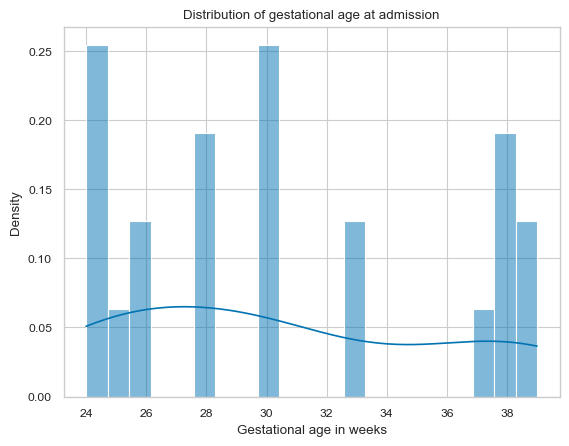

In [6]:
#group by linkid and plot distribution of amddd
sns.histplot(df['gestational_age']/7,kde=True,bins=21,stat='density')
#set x axislabel to gestational age in weeks
plt.xlabel('Gestational age in weeks')
plt.ylabel('Density')
plt.title('Distribution of gestational age at admission')
plt.show()

In [7]:
#
#describe gestational age
(df['gestational_age']/7).describe()

count    22.000000
mean     30.545455
std       5.466149
min      24.000000
25%      26.000000
50%      30.000000
75%      36.000000
max      39.000000
Name: gestational_age, dtype: float64

<h3>Inside region </h3>

In [8]:
#filter where region inside
df_inside = df[(df['region'] != 'Other (outside)') & (df['region'] != 'regio Delft') ]

In [9]:
#statistics of amddd
print((df_inside['gestational_age']/7).describe())

count    22.000000
mean     30.545455
std       5.466149
min      24.000000
25%      26.000000
50%      30.000000
75%      36.000000
max      39.000000
Name: gestational_age, dtype: float64


<Axes: xlabel='gestational_age', ylabel='Count'>

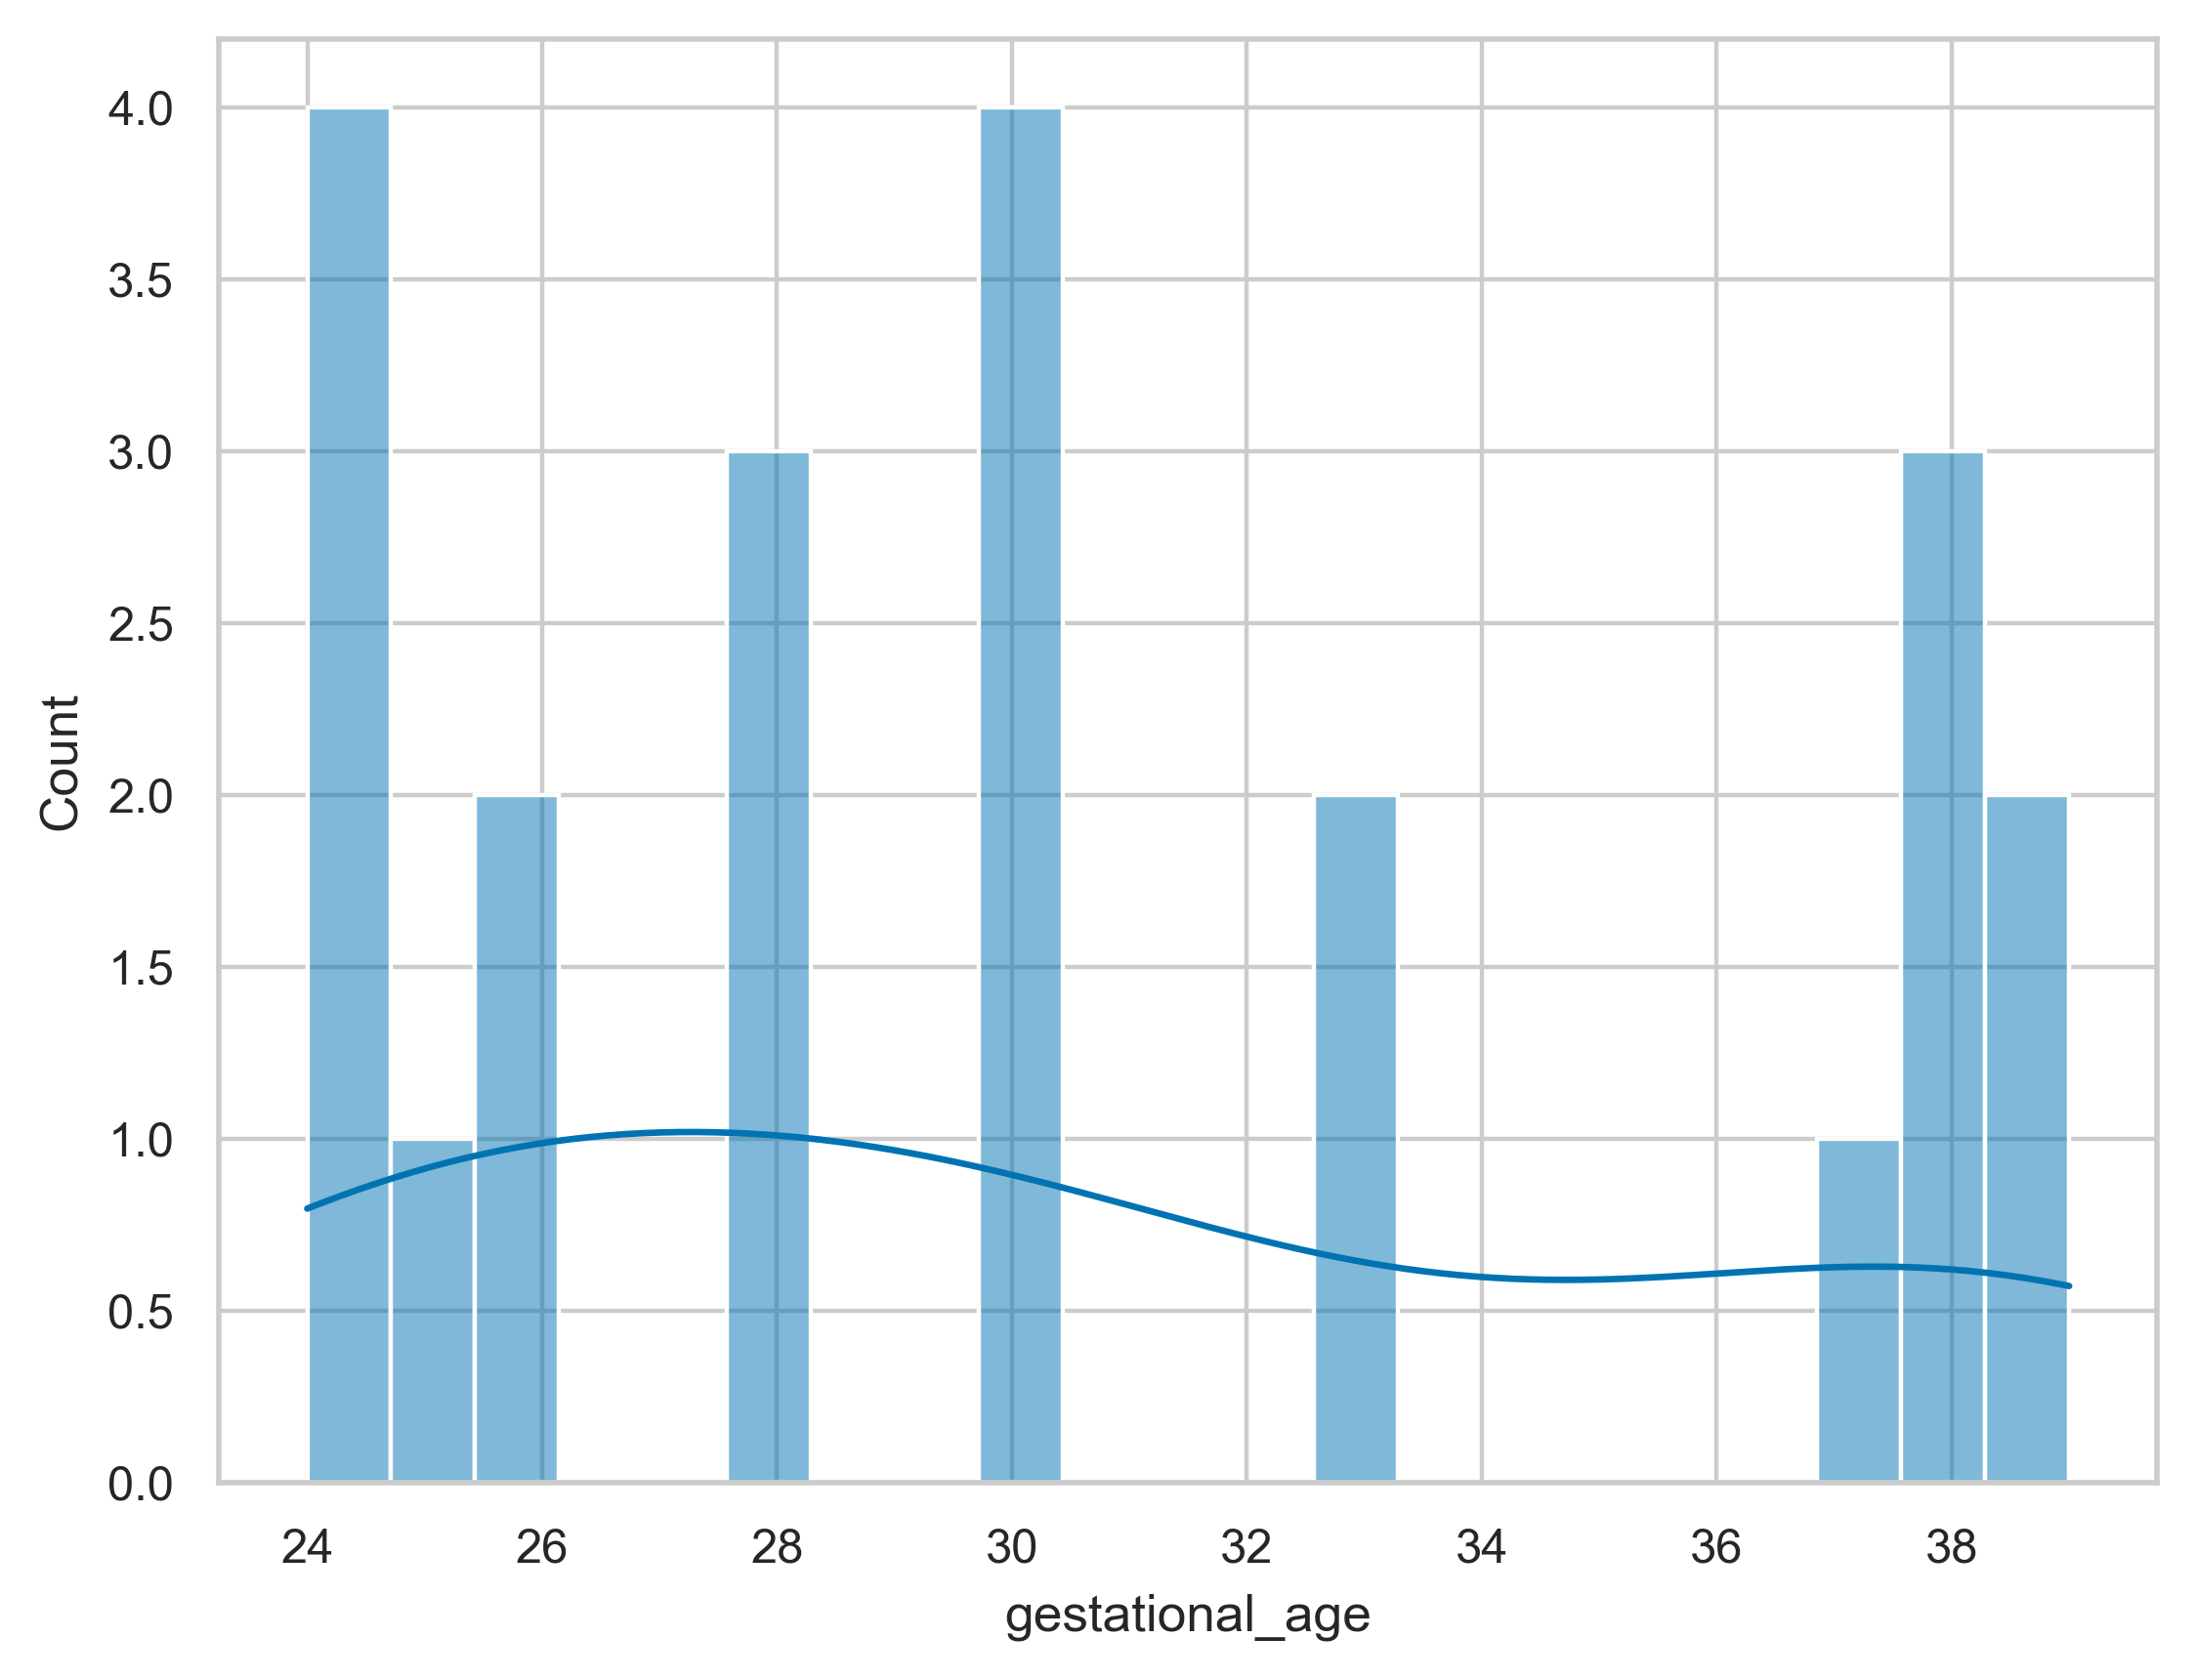

In [10]:
#group by linkid and plot distribution of amddd
#400 dpi
plt.figure(dpi=400)
sns.histplot(df_inside['gestational_age']/7,kde=True,bins=21)

In [11]:
from sklearn.mixture import GaussianMixture


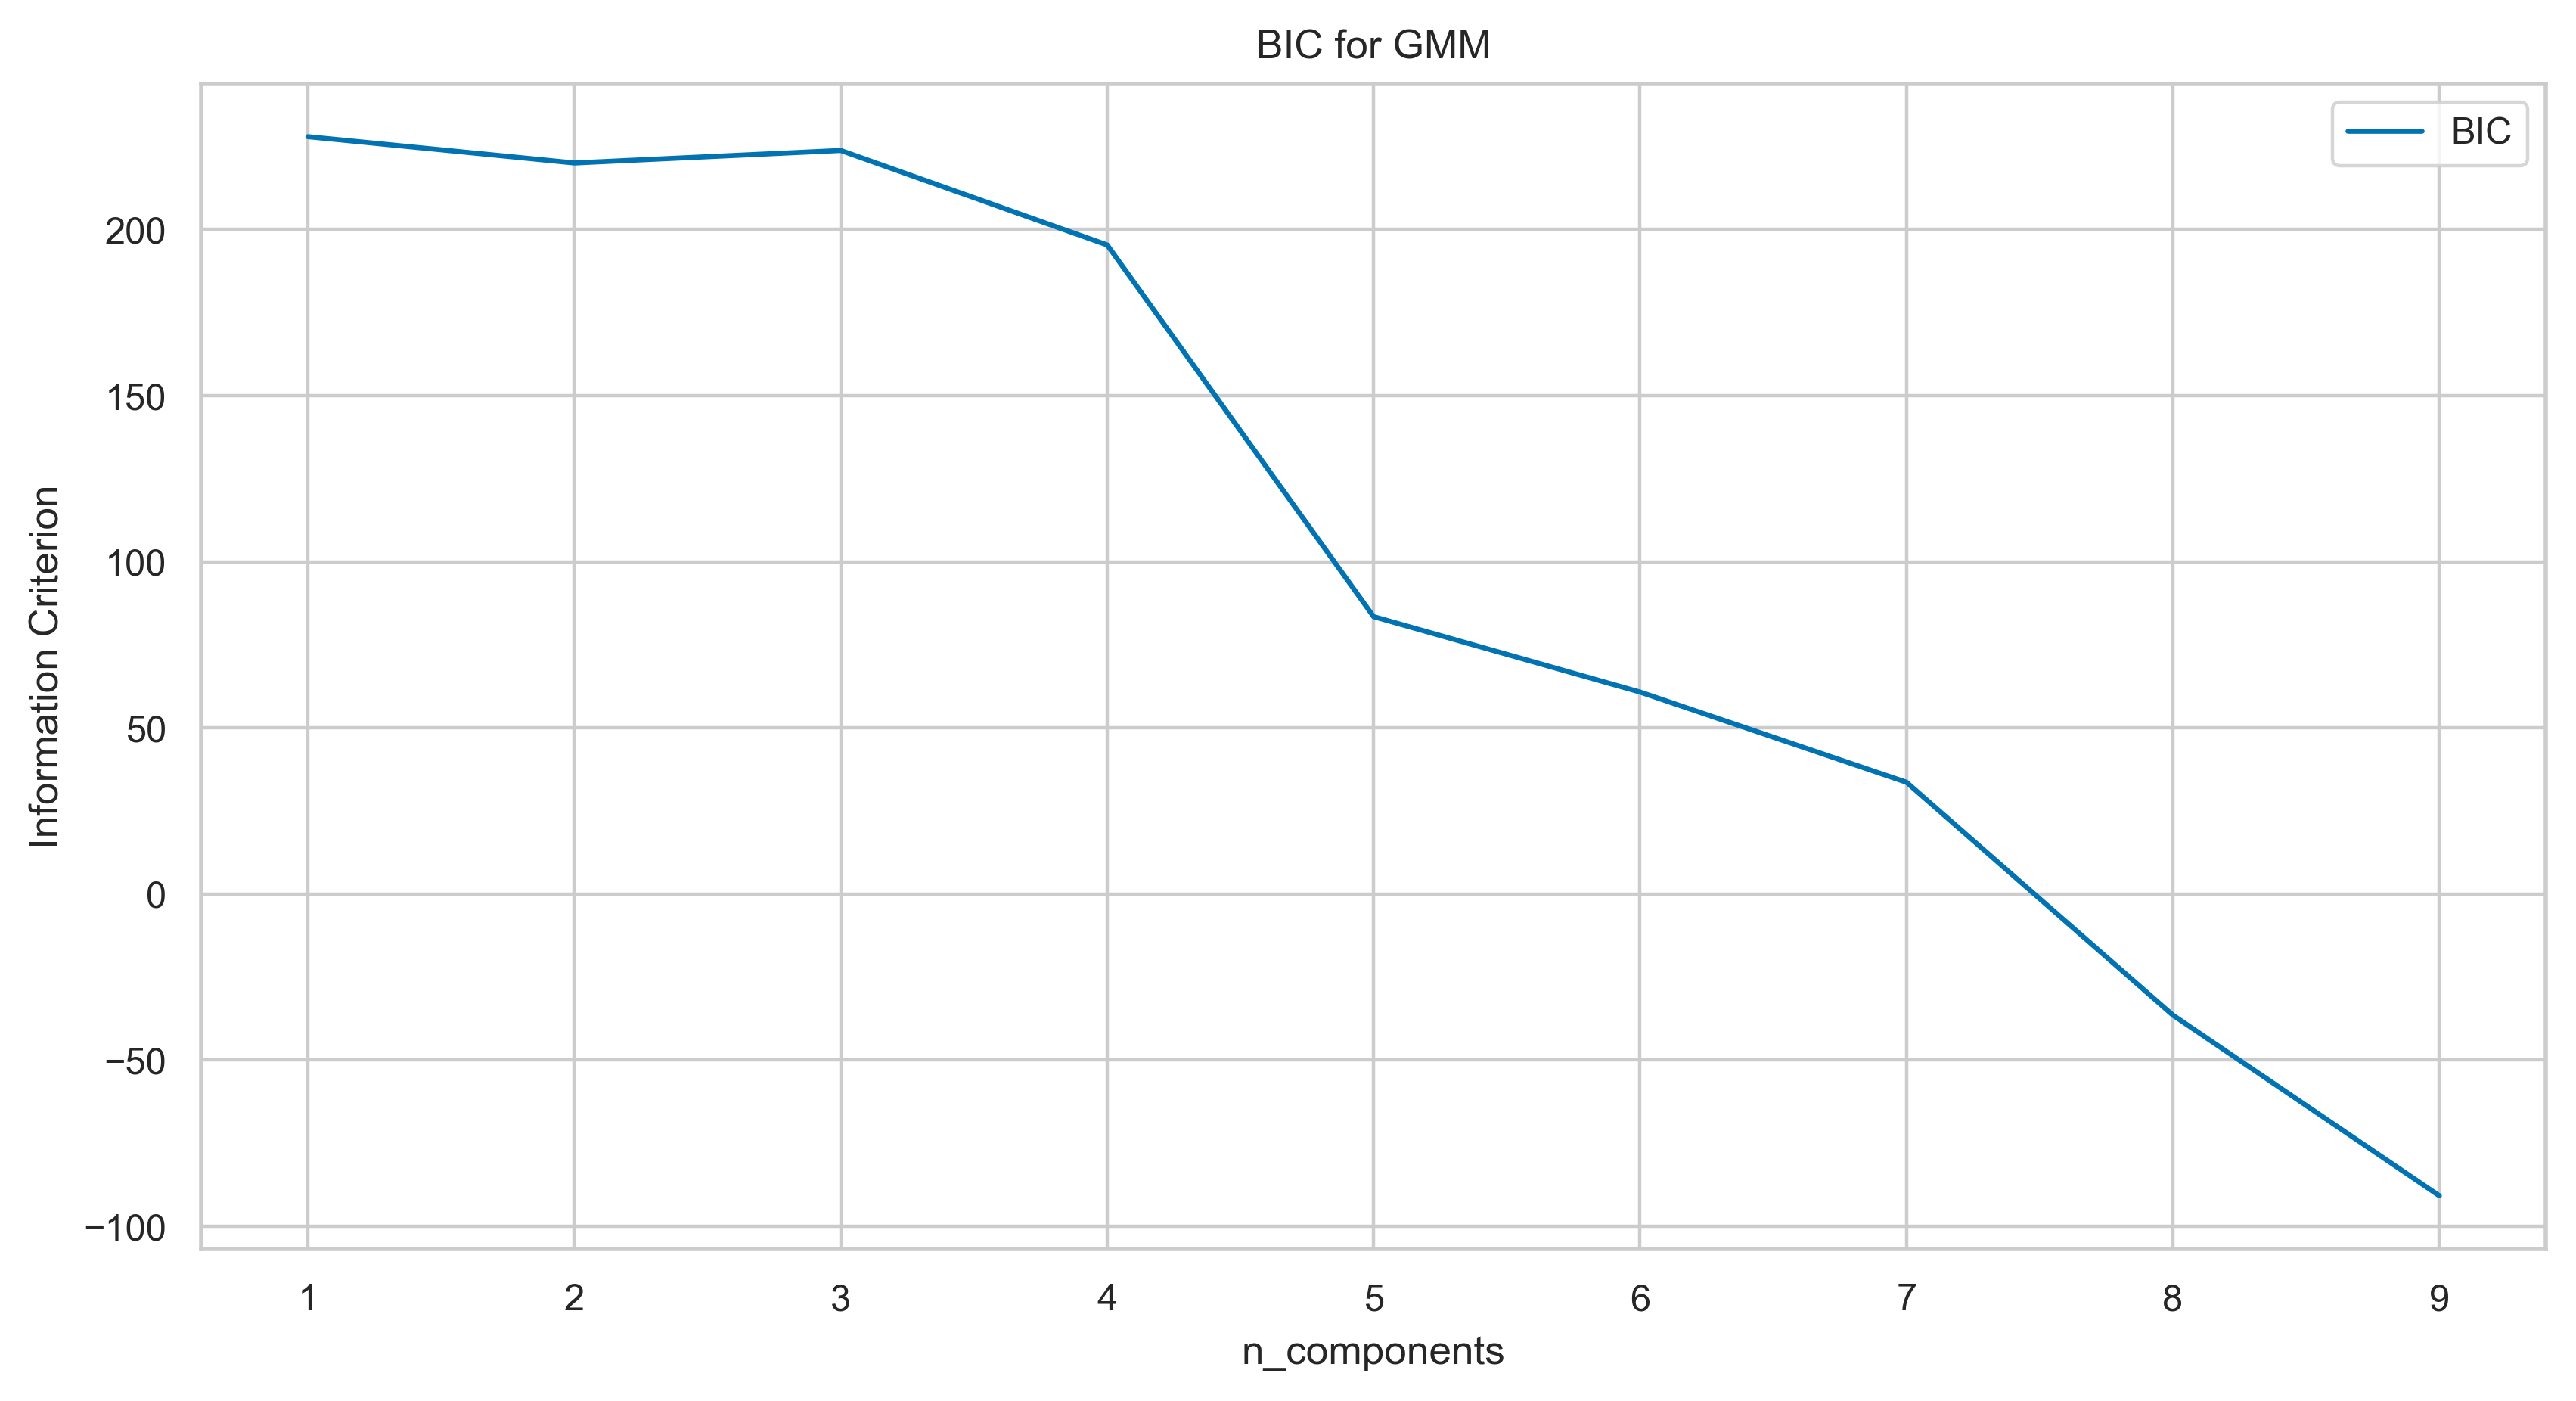

In [12]:
n_components = np.arange(1, 10)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(df_inside['gestational_age'].values.reshape(-1,1)) for n in n_components]
aics = [model.aic(df_inside['gestational_age'].values.reshape(-1,1)) for model in models]
bics = [model.bic(df_inside['gestational_age'].values.reshape(-1,1)) for model in models]

plt.figure(figsize=(10,5),dpi=400)
#plt.plot(n_components, aics, label='AIC')
plt.plot(n_components, bics, label='BIC')
plt.xlabel('n_components')
plt.ylabel('Information Criterion')
plt.legend()
plt.title('BIC for GMM')
plt.show()

In [13]:

gmm = GaussianMixture(n_components=2,covariance_type="full")
gmm.fit(df_inside['gestational_age'].values.reshape(-1,1))
samples = gmm.sample(len(df_inside['gestational_age']))
samples = samples[0].flatten()
#sort samples
samples = np.sort(samples)

Text(0.5, 1.0, 'GMM fit to gestational age in weeks')

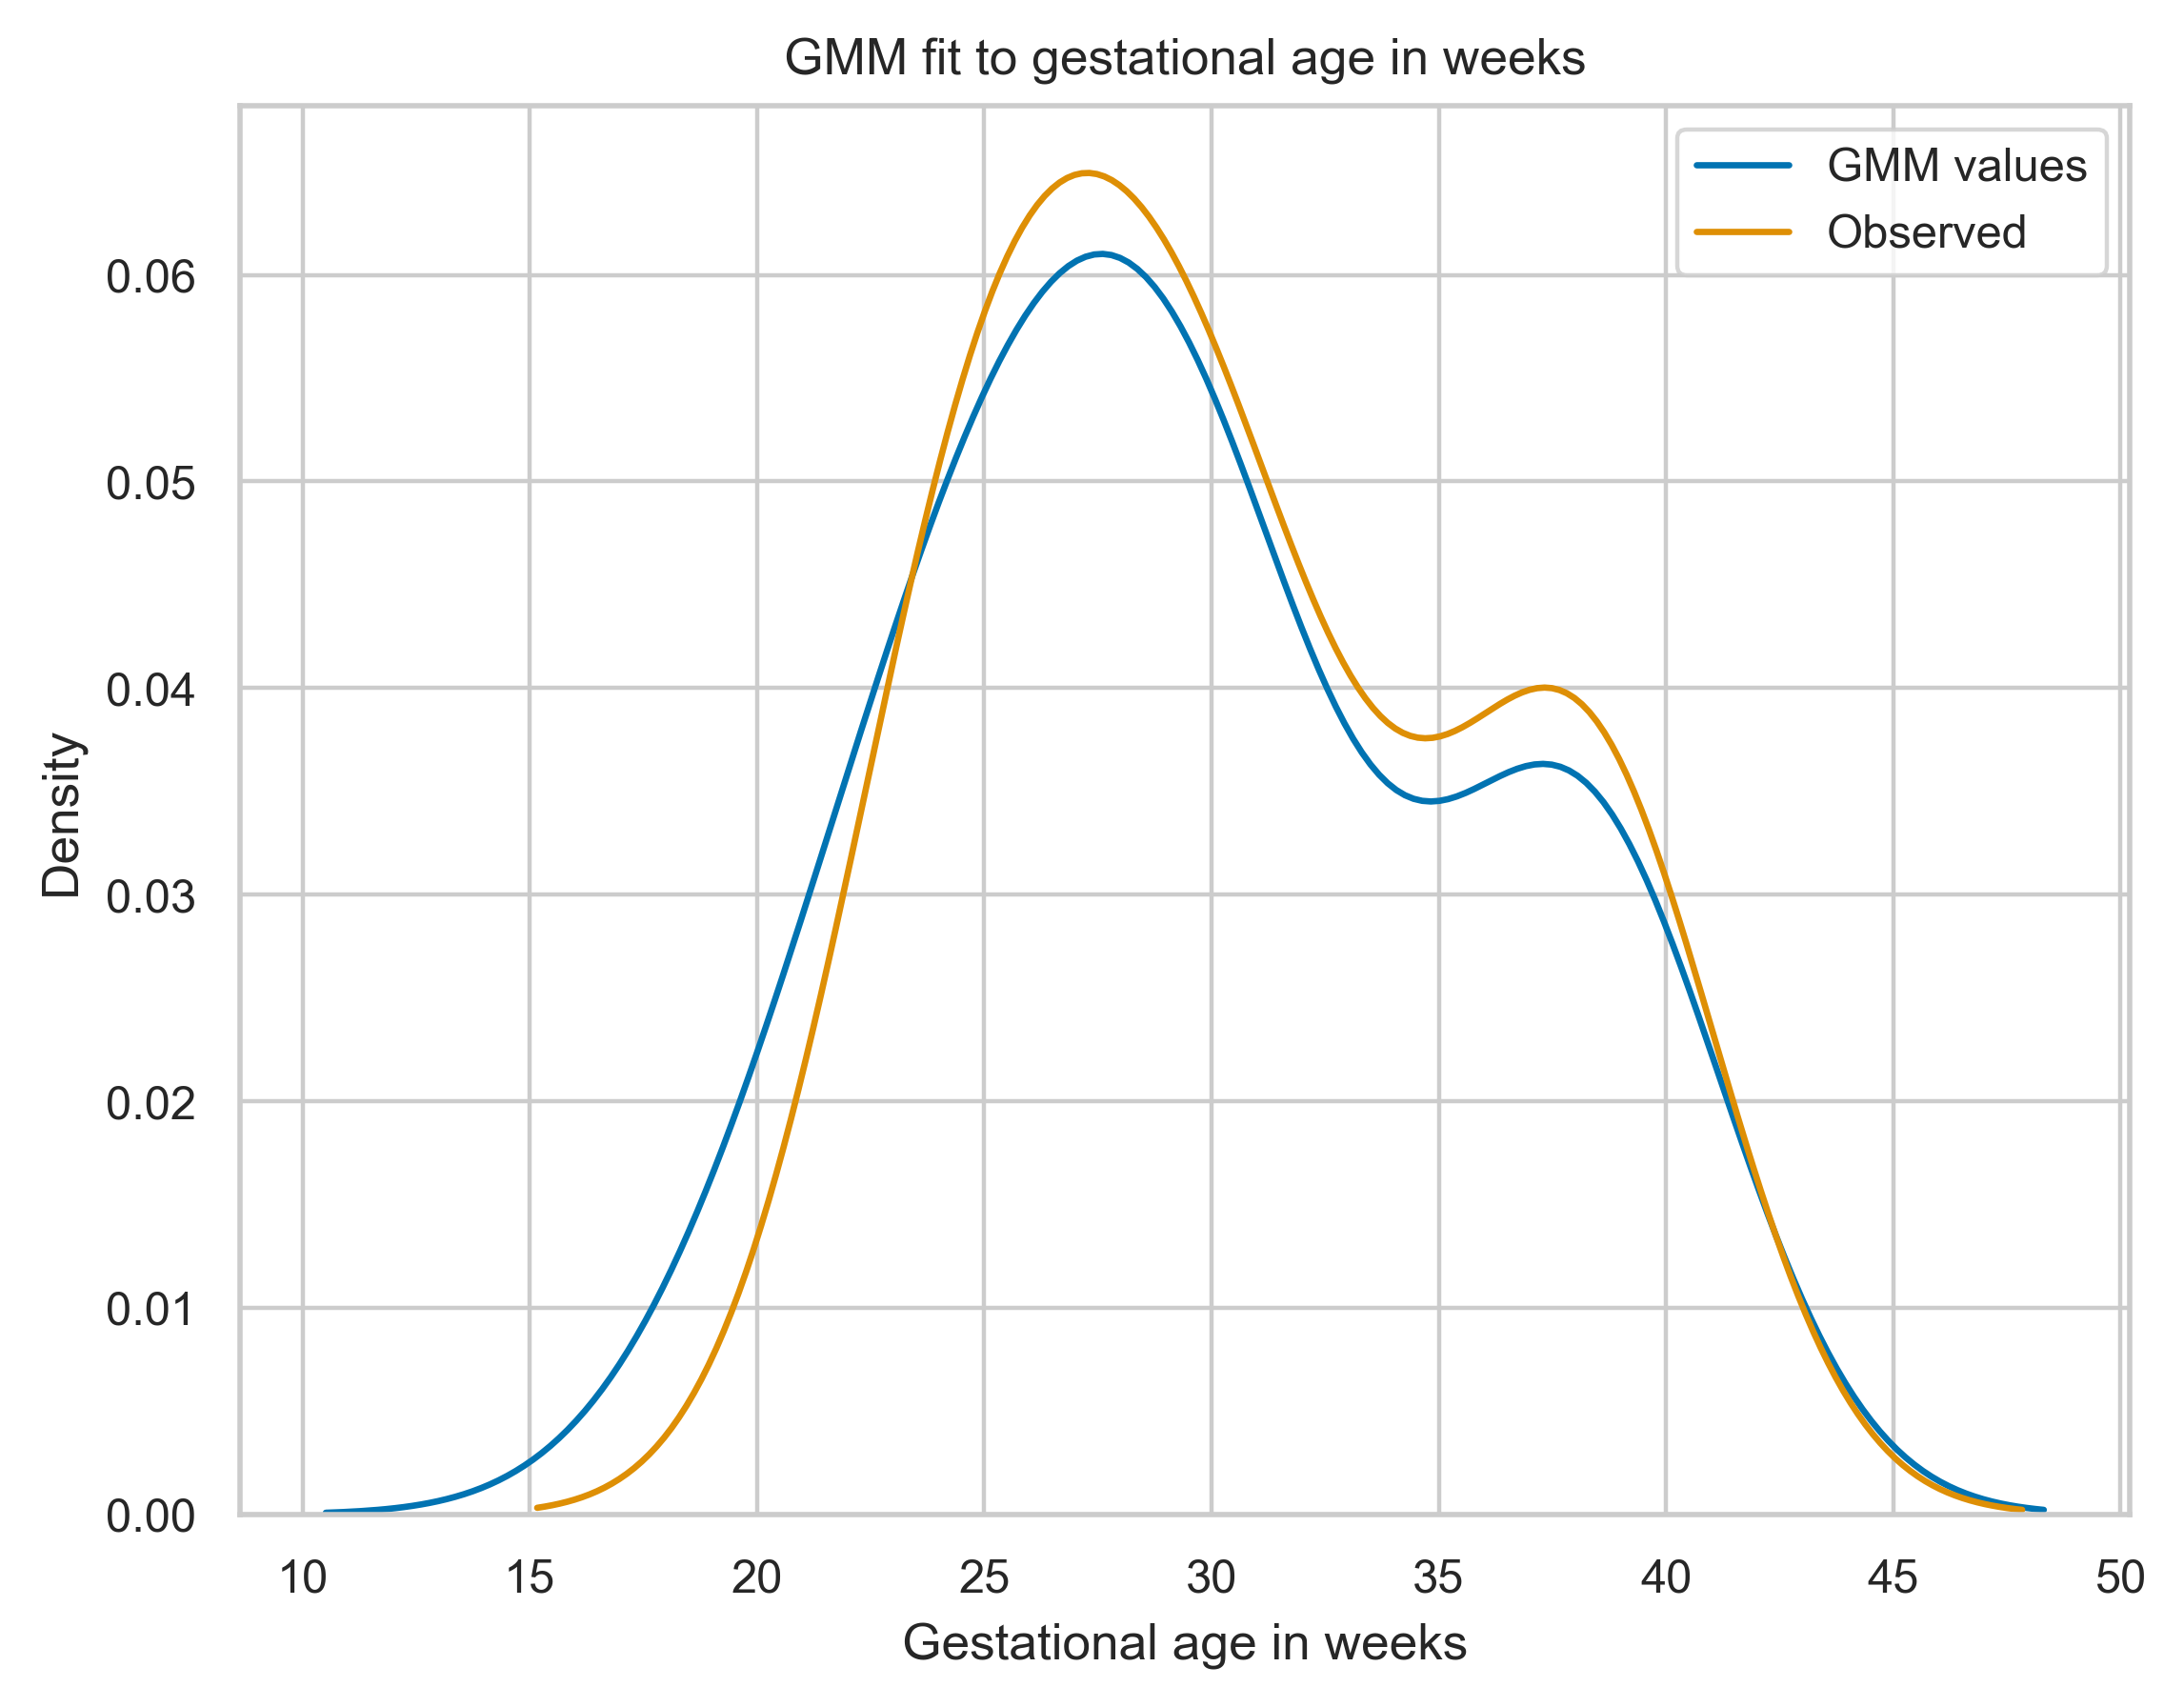

In [14]:
#400 dpi
plt.figure(dpi=400)
#plot samples
sns.kdeplot(samples/7)
sns.kdeplot(df_inside['gestational_age']/7)
plt.legend(['GMM values','Observed'])
#x axis label
plt.xlabel('Gestational age in weeks')
#title
plt.title('GMM fit to gestational age in weeks')


In [15]:
test = df_inside['gestational_age'].sort_values()
#error sample and test
errors = np.abs(test-samples)
print(errors.mean())


5.791007626059298


In [16]:
print(gmm.means_,gmm.weights_,gmm.covariances_,gmm.converged_)

[[193.95010649]
 [267.19816686]] [0.72875629 0.27124371] [[[453.81633271]]

 [[ 22.98053229]]] True
